In [0]:
# Importing the libraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
# Importing the dataset
listings = pd.read_csv('listings.csv', usecols = ['id', 'name', 'description'])
listings.head(10)

,id,name,description
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...
6,1909058,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...
7,856550,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com..."
8,4948745,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i..."
9,2493658,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie..."


In [4]:
# Importing the dataset
listings = pd.read_csv('listings.csv', usecols = ['id', 'name', 'description'])
listings.head(10)

,id,name,description
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...
6,1909058,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...
7,856550,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com..."
8,4948745,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i..."
9,2493658,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie..."


In [0]:
listings['name'] = listings['name'].astype('str')
listings['description'] = listings['description'].astype('str')

In [0]:
name_corpus = ' '.join(listings['name'])
description_corpus = ' '.join(listings['description'])

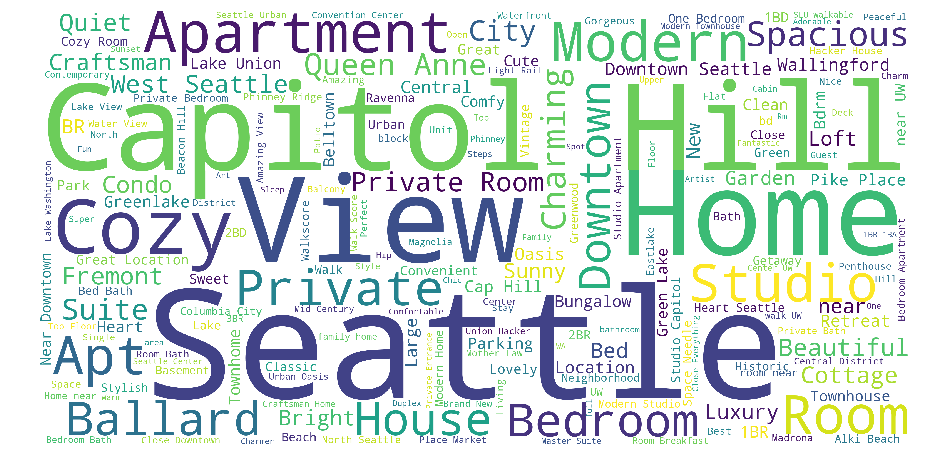

In [7]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

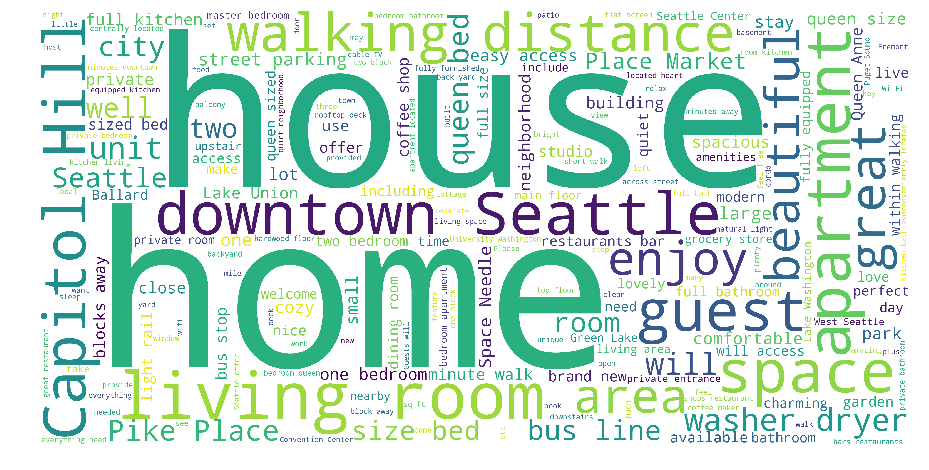

In [8]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [0]:
listings['content'] = listings[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [0]:
# Fillna
listings['content'].fillna('Null', inplace = True)

In [0]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(listings['content'])

In [0]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
results = {}
for idx, row in listings.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], listings['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [0]:
def item(id):
    name   = listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [15]:
recommend(item_id = 4085439, num = 5)

Recommending 5 products similar to Historic Ballard House 
Description: Built in 1900 in the heart of Ballard, our house is conveniently located within walking distance to some of Seattle's best restaurants and shops, the Hiram Chittende...
---

Recommended: Restful Room w/Bath in West Ballard 
Description: A quiet and peaceful room with private bath in the Sunset Hill area of West Ballard in a neighborhood setting.  Plenty of street parking.  Use of the kitchen.  No cl...
(score:0.12235188993161443)

Recommended: Heart of Ballard Craftsman Home 
Description: Updated 1907 Classic Ballard Neighborhood Home. Sleeps up to 12 guests, 3 bathrooms, 2 fully equipped kitchens, linens and towels provided. This Historic Craftsman h...
(score:0.12056746864539457)

Recommended: Ballard Private Room w Double Bed 
Description: My house is in one of Seattle's most desirable neighborhoods, Ballard. It's walking distance to the Ballard Locks, shops and restaurants of Old Ballard and Golden Ga...
(score

Airbnb
https://www.kaggle.com/rdaldian/airbnb-content-based-recommendation-system